# PCA and classification of images
### Tingting Ou

### Last modified: July 08, 2019

The folders of images should be in the same directory as this script.

The folders are:

normal200: 200 normal images

normal800: 800 normal images

check: 100 checkerboard images

lines: 100 images with horizontal lines

In [30]:
from sklearn.decomposition import PCA

In [2]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [3]:
input_path = 'check'
count = 0
for image_path in os.listdir(input_path):
        
    img = cv2.imread(os.path.join(input_path, image_path), 0)
    
    scale_percent = 25
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #print(resized_img.shape)
    
    if count == 0:
        Check = resized_img.flatten().reshape((1,272*480))
        count += 1
    else:
        count += 1
        Check = np.vstack((Check, resized_img.flatten().reshape((1,272*480))))

In [4]:
input_path = 'lines'
count = 0
for image_path in os.listdir(input_path):
        
    img = cv2.imread(os.path.join(input_path, image_path), 0)
    
    scale_percent = 25
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    # print(resized_img.shape)
    
    if count == 0:
        Line = resized_img.flatten().reshape((1,272*480))
        count += 1
    else:
        count += 1
        Line = np.vstack((Line, resized_img.flatten().reshape((1,272*480))))

In [6]:
input_path = 'normal200'
count = 0
for image_path in os.listdir(input_path):
    
    if not image_path.endswith('.png') and not image_path.endswith('.jpg') and not image_path.endswith('.jpeg'):
        continue
        
    img = cv2.imread(os.path.join(input_path, image_path), 0)
    
    scale_percent = 25
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    # print(resized_img.shape)
    
    if count == 0:
        Normal200 = resized_img.flatten().reshape((1,272*480))
        count += 1
    else:
        count += 1
        Normal200 = np.vstack((Normal200, resized_img.flatten().reshape((1,272*480))))

In [8]:
print(Check.shape)
print(Check[5,:])

print(Line.shape)
print(Line[5,:])

print(Normal200.shape)
print(Normal200[5,:])

(100, 130560)
[137 136 136 ... 151 155 158]
(100, 130560)
[111 111 111 ...  50  41  39]
(200, 130560)
[38 39 35 ... 36 36 36]


In [12]:
Y = np.vstack((Check, Line, Normal200))
a = np.ones(100).reshape(100,1)
b = np.zeros(100).reshape(100,1)
c = np.zeros(200).reshape(200,1)
c[:,:] = 2
labels = np.vstack((a,b,c))
labels = labels.ravel()
print(labels[99])
print(labels[150])
print(labels[304])
print(Y.shape)

1.0
0.0
2.0
(400, 130560)


## PCA with 2 PC

Text(0, 0.5, 'component 2')

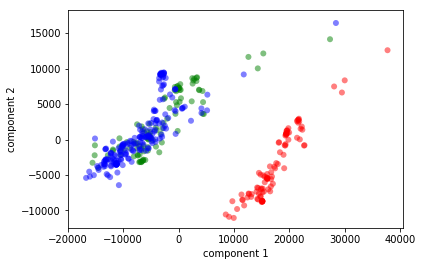

In [13]:
pca = PCA(2)  
projected_2 = pca.fit_transform(Y)

plt.scatter(projected_2[:100, 0], projected_2[:100, 1],color= 'r',
             edgecolor='none', alpha=0.5)

plt.scatter(projected_2[100:200, 0], projected_2[100:200, 1],color= 'g',
             edgecolor='none', alpha=0.5)

plt.scatter(projected_2[200:, 0], projected_2[200:, 1],color= 'b',
             edgecolor='none', alpha=0.5)


plt.xlabel('component 1')
plt.ylabel('component 2')

## PCA with 3 PC & classification

(400, 3)


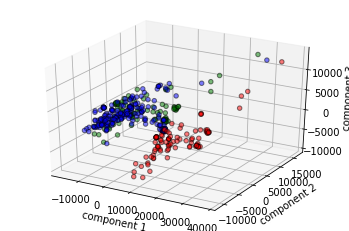

In [15]:
pca = PCA(3)  
projected_3 = pca.fit_transform(Y)
print(projected_3.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')

ax.scatter(projected_3[:100, 0], projected_3[:100, 1], projected_3[:100, 2],color= 'r',
             edgecolor='none', alpha=0.5)

ax.scatter(projected_3[100:200, 0], projected_3[100:200, 1], projected_3[100:200, 2],color= 'g',
             edgecolor='none', alpha=0.5)


ax.scatter(projected_3[200:, 0], projected_3[200:, 1], projected_3[200:, 2],color= 'b',
             edgecolor='none', alpha=0.5)

In [17]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm
from sklearn import tree

In [18]:
X = projected_3 # change to "projected_2" (2 PC) or "Y" (no PCA)
y = labels
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [19]:
clf = neighbors.KNeighborsClassifier(10) # 10: number of neighbors we use
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

0.8125


In [20]:
clf = LinearDiscriminantAnalysis()
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

0.8150000000000001


In [21]:
clf = QuadraticDiscriminantAnalysis()
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

0.7875


In [22]:
clf = svm.SVC(kernel='rbf')
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

0.5


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

In [23]:
clf = tree.DecisionTreeClassifier(max_depth=5)
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

0.82


## Change to another data set (800 normal images)

In [26]:
input_path = 'normal800'
count = 0
for image_path in os.listdir(input_path):
    
    if not image_path.endswith('.png') and not image_path.endswith('.jpg') and not image_path.endswith('.jpeg'):
        continue
        
    img = cv2.imread(os.path.join(input_path, image_path), 0)
    
    scale_percent = 25
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    
    resized_img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    # print(resized_img.shape)
    
    if count == 0:
        Normal800 = resized_img.flatten().reshape((1,272*480))
        count += 1
    else:
        count += 1
        Normal800 = np.vstack((Normal800, resized_img.flatten().reshape((1,272*480))))

In [27]:
Y = np.vstack((Check, Line, Normal800))
a = np.ones(100).reshape(100,1)
b = np.zeros(100).reshape(100,1)
c = np.zeros(800).reshape(800,1)
c[:,:] = 2
labels = np.vstack((a,b,c))
labels = labels.ravel()

## PCA with 3 PC

In [28]:
pca = PCA(3)  
X = pca.fit_transform(Y)
y = labels

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

clf = neighbors.KNeighborsClassifier(10) # 10: number of neighbors we use
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

clf = LinearDiscriminantAnalysis()
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

clf = QuadraticDiscriminantAnalysis()
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

clf = svm.SVC(kernel='rbf')
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

clf = tree.DecisionTreeClassifier(max_depth=5)
sc = cross_val_score(clf, X, y, cv=10)
print(np.mean(sc))

0.9030000000000001
0.8949999999999999
0.8869999999999999


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

0.8
0.892


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
